## Case Study on Testing of Hypothesis
A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.
* The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.
* The company needs to check whether there is any dependency between the
features “Region” and “Manager”.
Help the company to carry out their study with the help of data provided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales_add.csv')

In [3]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
df.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
df.rename(columns = {'Sales_before_digital_add(in $)': 'Sales_before' ,'Sales_After_digital_add(in $)':'Sales_after' },inplace =True)

In [7]:
df.columns

Index(['Month', 'Region', 'Manager', 'Sales_before', 'Sales_after'], dtype='object')

In [8]:
df.describe()

,Sales_before,Sales_after
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


## Check whether there is increase in sales

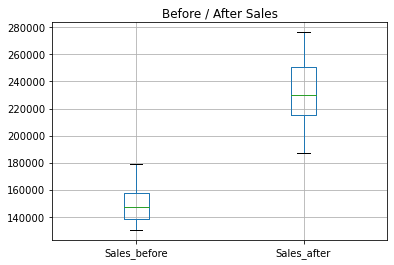

In [9]:
df[['Sales_before', 'Sales_after']].boxplot()
plt.title("Before / After Sales")
plt.show()

Data shows that there is a difference in total sales before and after digital marketing. We will further verify using paired T test.

###  One tailed Paired T Test

* H0: Sales remains same before and after  digital marketing
* H1: Increase in sales after digital marketing

In [10]:
# set alpha
alpha  = .05

In [11]:
#import paired ttest module
from scipy.stats import ttest_rel

In [12]:
# here we will set alternative parameter as greater for the ttest function.
# here after_sales is assumed greater,hence first parameter should be after_sales
_,p = ttest_rel( df['Sales_after'],df['Sales_before'], alternative = 'greater')

In [13]:
print("P value : ", p)
if p < alpha:
    print("Reject null")
else:
    print("Fail to reject null")
    

P value :  3.168333502287889e-11
Reject null


***
### From the given data we can conclude hat there is an increase in sales after stepping into digital marketing.
***

## Check for dependency between Region and Manager

In [14]:
df.describe(include = object)

,Month,Region,Manager
count,22,22,22
unique,22,3,3
top,Month-1,Region - A,Manager - A
freq,1,10,9


In [15]:
df['Region'].value_counts()

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

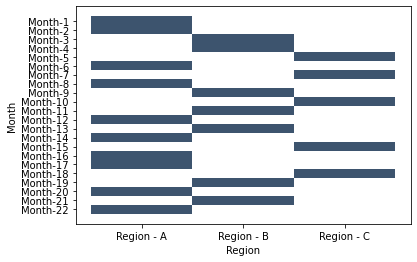

In [16]:
sns.histplot(data = df, y = 'Month', x = 'Region', multiple = 'dodge', shrink = .8)
plt.show()

For the given sample, data is available from Month-1 to Month-22. For each month Region seems to be selected at random.

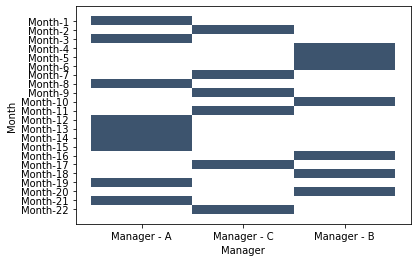

In [17]:
sns.histplot(data = df, y = 'Month', x = 'Manager', multiple = 'dodge', shrink = .8)
plt.show()

From the given data, for each month, Manager also seems to be selected at random.

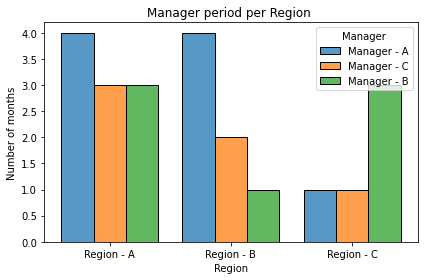

In [18]:
sns.histplot(data = df, x = 'Region', hue = 'Manager', multiple = 'dodge', shrink = .8)
plt.title ("Manager period per Region ")
plt.ylabel("Number of months")
plt.tight_layout()
plt.show()

As per data, either region or manager seems to be selected at random. Manger A,B and C has served for each regions for various months.Further validation for relation between 'Manager' and 'Region' can be done using a chi squared test of independence.

### Chi squared test of independence

* H0 : There is no dependency between region and manager
* H1 : There is a dependency between region and manager

In [19]:
#set alpha
alpha =.05

In [20]:
# To apply chi squared test of independence, we need a crosstabulation table.
ct = pd.crosstab(df['Region'], df['Manager'])
ct

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [21]:
# import Chi squared test of independence module
from scipy.stats import chi2_contingency

In [22]:
_, p, _, _ = chi2_contingency(ct) #result is a tuple with 4 elements.p value is the second item

In [23]:
print("P value : ", p)
if p < alpha:
    print("Reject null.")
else:
    print("Fail to reject null.")

P value :  0.5493991051158094
Fail to reject null.


***
### From the data, we can conclude that there is no dependency between Region and Manager.
***